In [ ]:
from PIL import Image
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from tensorflow import keras

# Replace 'path/to/your/model.h5' with the actual path to your saved model
model_path = '/content/gdrive/MyDrive/AutoEncoder/models/1024Conv/autoenc_relu1024res_T4_2_final.keras'
autoencoder = keras.models.load_model(model_path)

In [ ]:
ximg = Image.open('/content/dark1.png')

# Convert images to arrays
ximg = ximg


# Resize images
ximg = np.array(ximg.resize((768, 1024),Image.Resampling.LANCZOS))


# Convert images to grayscale
xgrayscale_image = np.array(Image.fromarray(ximg).convert('L'))

In [ ]:
from IPython.display import display

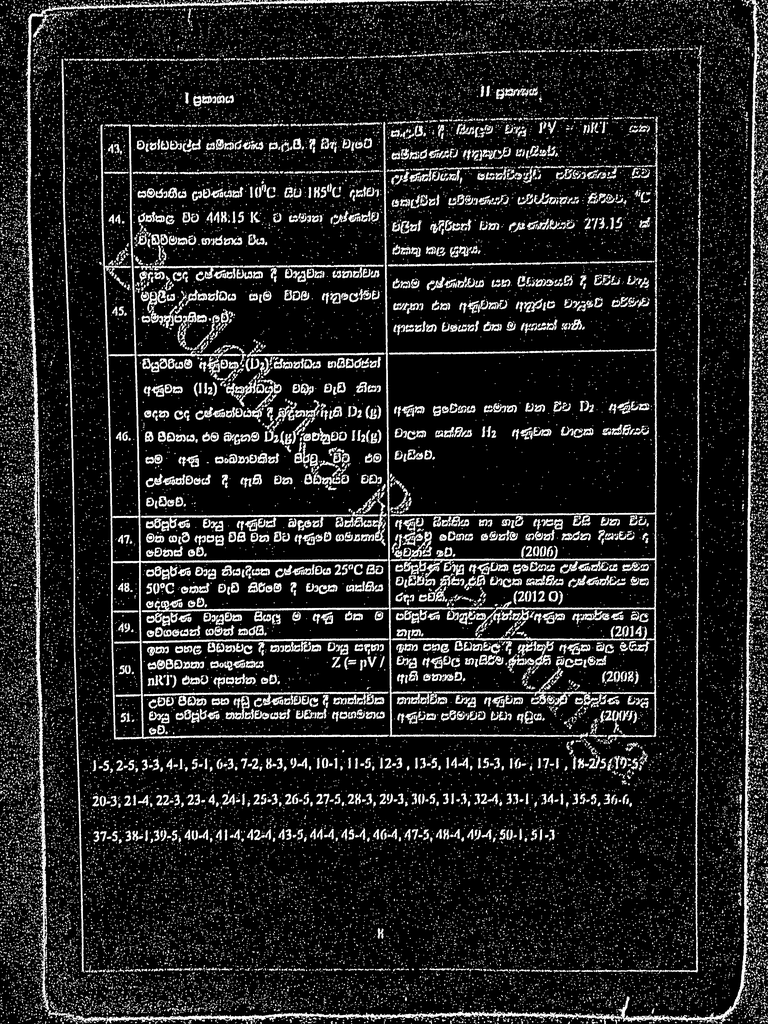

In [ ]:
img_pil = Image.fromarray(xgrayscale_image)

# Display the image
display(img_pil)

In [ ]:
xgrayscale_image.shape

(1024, 768)

In [ ]:
reshaped_input = np.reshape(xgrayscale_image, (1, 1024, 768, 1))

In [ ]:
reshaped_input.shape

(1, 2048, 1536, 1)

In [ ]:
reconstructed_img = autoencoder.predict(reshaped_input)

1/1 [==============================] - 12s 12s/step


In [ ]:
reconstructed_img.shape

(1, 2048, 1536, 1)

In [ ]:
reconstructed_img_1 = np.squeeze(reconstructed_img, axis=(0, 3))

In [ ]:
reconstructed_img_1.shape

(1024, 768)

In [ ]:
reconstructed_img_1

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        4.199949  ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.48325557,
        7.1687803 ]], dtype=float32)

In [ ]:
scaled_array = (reconstructed_img_1 - np.min(reconstructed_img_1)) / (np.max(reconstructed_img_1) - np.min(reconstructed_img_1)) * 255

In [ ]:
scaled_array

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        4.309163  ],
       [0.        , 0.88241607, 0.        , ..., 0.        , 0.        ,
        6.258316  ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        3.1794097 ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [ ]:
reconstructed_img_1=scaled_array.astype(np.uint8)

In [ ]:
reconstructed_img_2=reconstructed_img_1.astype(np.uint8)

In [ ]:
reconstructed_img_2

array([[48, 50, 48, ..., 51, 52, 49],
       [48, 49, 46, ..., 57, 58, 53],
       [45, 44, 42, ..., 55, 57, 52],
       ...,
       [45, 49, 47, ..., 59, 56, 64],
       [47, 51, 50, ..., 54, 52, 61],
       [44, 48, 47, ..., 90, 83, 76]], dtype=uint8)

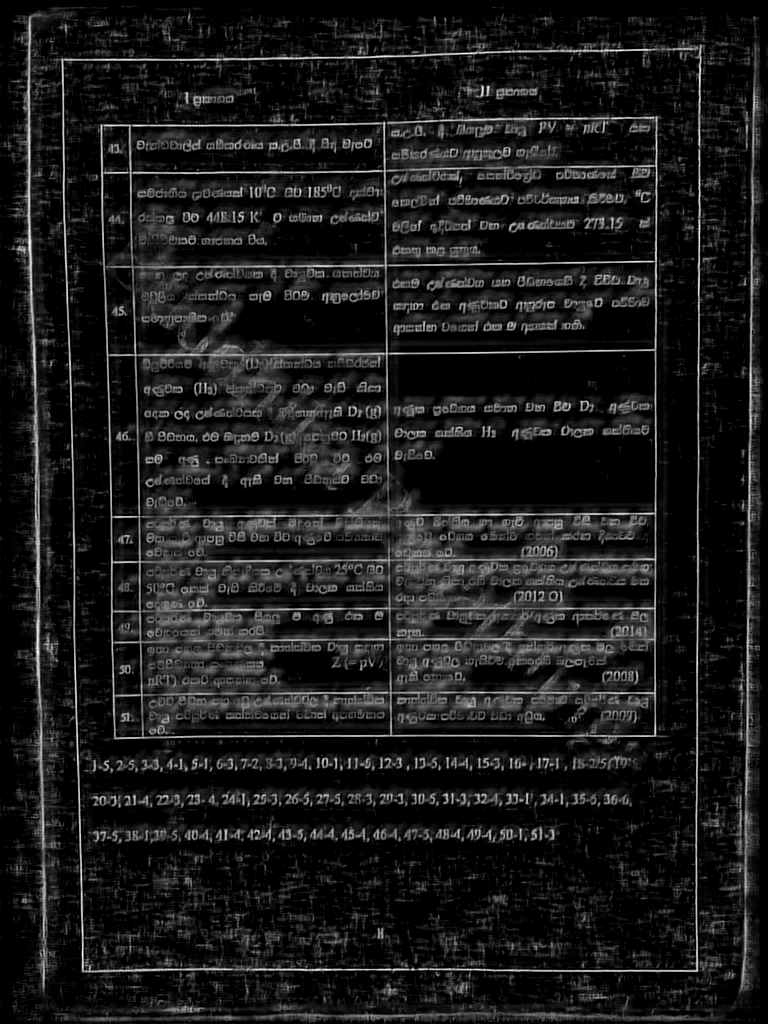

In [ ]:
img_pil = Image.fromarray(reconstructed_img_1)

# Display the image
display(img_pil)